In [1]:
import pandas as pd
import os
import xgboost as xgb
import operator
from matplotlib import pylab as plt
from sklearn import preprocessing

In [4]:
data_path = "/Users/yu.zadorozhnaya/Machine-Learning-and-Predictive-Analytics-MSU-/supervized_classification_data"
train = pd.read_csv(os.path.join(data_path,"train_sample.csv"))
test = pd.read_csv(os.path.join(data_path,"test_sample.csv"))

In [5]:
labels = train.target.values
labels = preprocessing.LabelEncoder().fit_transform(labels)
train = train.drop(["target"], axis=1)
features=list(train.columns[0:])
test = test.drop("id", axis = 1)

In [6]:
params = {"objective": "multi:softprob", "eval_metric":"mlogloss", "num_class": 9}
train_xgb = xgb.DMatrix(train, labels)
test_xgb  = xgb.DMatrix(test)
trainRound = 200

In [7]:
gbm = xgb.train(params, train_xgb, trainRound)
pred = gbm.predict(test_xgb)

In [8]:
outfile = open('xgb.fmap', 'w')
i = 0
for feat in features:
    outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    i = i + 1
outfile.close()

<Figure size 640x480 with 0 Axes>

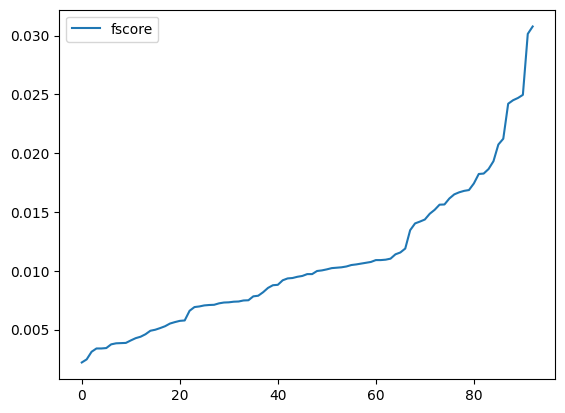

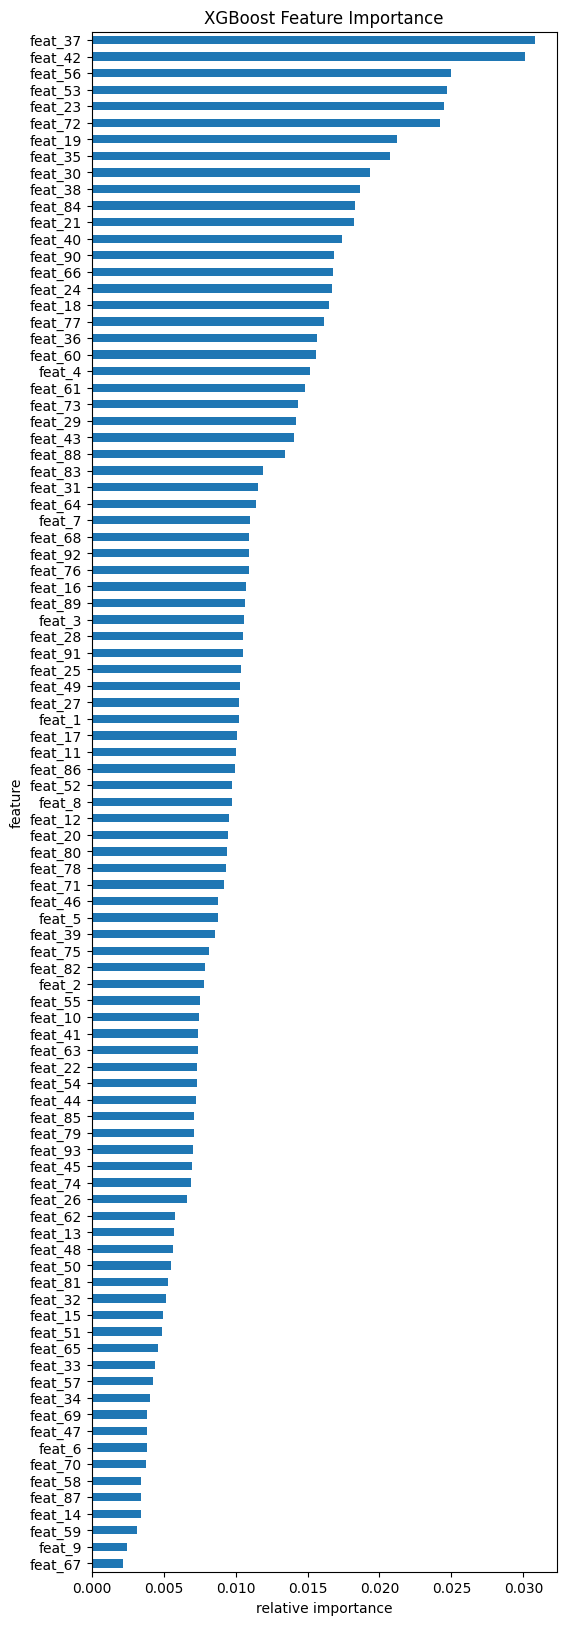

In [9]:
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [10]:
test.index

RangeIndex(start=0, stop=19594, step=1)

In [11]:
test_ = pd.read_csv(os.path.join(data_path,"test_sample.csv"))
pred = pd.DataFrame(pred, index=test_.id.values, columns=[f"{i}" for i in range(9)])
pred.index.name = "id"
pred.to_csv('prediction.csv')

In [ ]:
pred